In [135]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

In [136]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Set Options

In [137]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [138]:
# Read the data
df_vaccine = pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\Assignment and Projects\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv")

In [139]:
# Display the top 5 rows of the dataframe
df_vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


#### Dimensions of the data

In [140]:
data.shape

(26707, 34)

#### Data Analysis and Preparation

### Understand the dataset

###### Check for the Datatypes

In [141]:
df_vaccine.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

###### Change the incorrect datatype

In [142]:
# Use 'for' loop to change the data type of variables

for col in ['h1n1_worry','h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask',
            'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 
            'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition','cont_child_undr_6_mnths',
           'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 
            'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']:
# Use .astype() to change the data type    
    df_vaccine[col] = df_vaccine[col].astype('object')      

In [143]:
# Recheck the datatypes
df_vaccine.dtypes

unique_id                     int64
h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
dr_recc_h1n1_vacc            object
dr_recc_seasonal_vacc        object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
has_health_insur             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status              

In [144]:
df_vaccine.drop('unique_id', axis=1, inplace=True)

In [145]:
# Verify the shape
df_vaccine.shape

(26707, 33)

In [146]:
# Splitting the features and target variable
df_features = df_vaccine.iloc[:, df_vaccine.columns != 'h1n1_vaccine']

df_target = df_vaccine.iloc[:, df_vaccine.columns == 'h1n1_vaccine']

###### Summary Statistics

In [147]:
df_features.describe().transpose()

,count,unique,top,freq
h1n1_worry,26615,4,2,10575
h1n1_awareness,26591,3,1,14598
antiviral_medication,26636,2,0,25335
contact_avoidance,26499,2,1,19228
bought_face_mask,26688,2,0,24847
wash_hands_frequently,26665,2,1,22015
avoid_large_gatherings,26620,2,0,17073
reduced_outside_home_cont,26625,2,0,17644
avoid_touch_face,26579,2,1,18001
dr_recc_h1n1_vacc,24547,2,0,19139


#### Distribution of variables

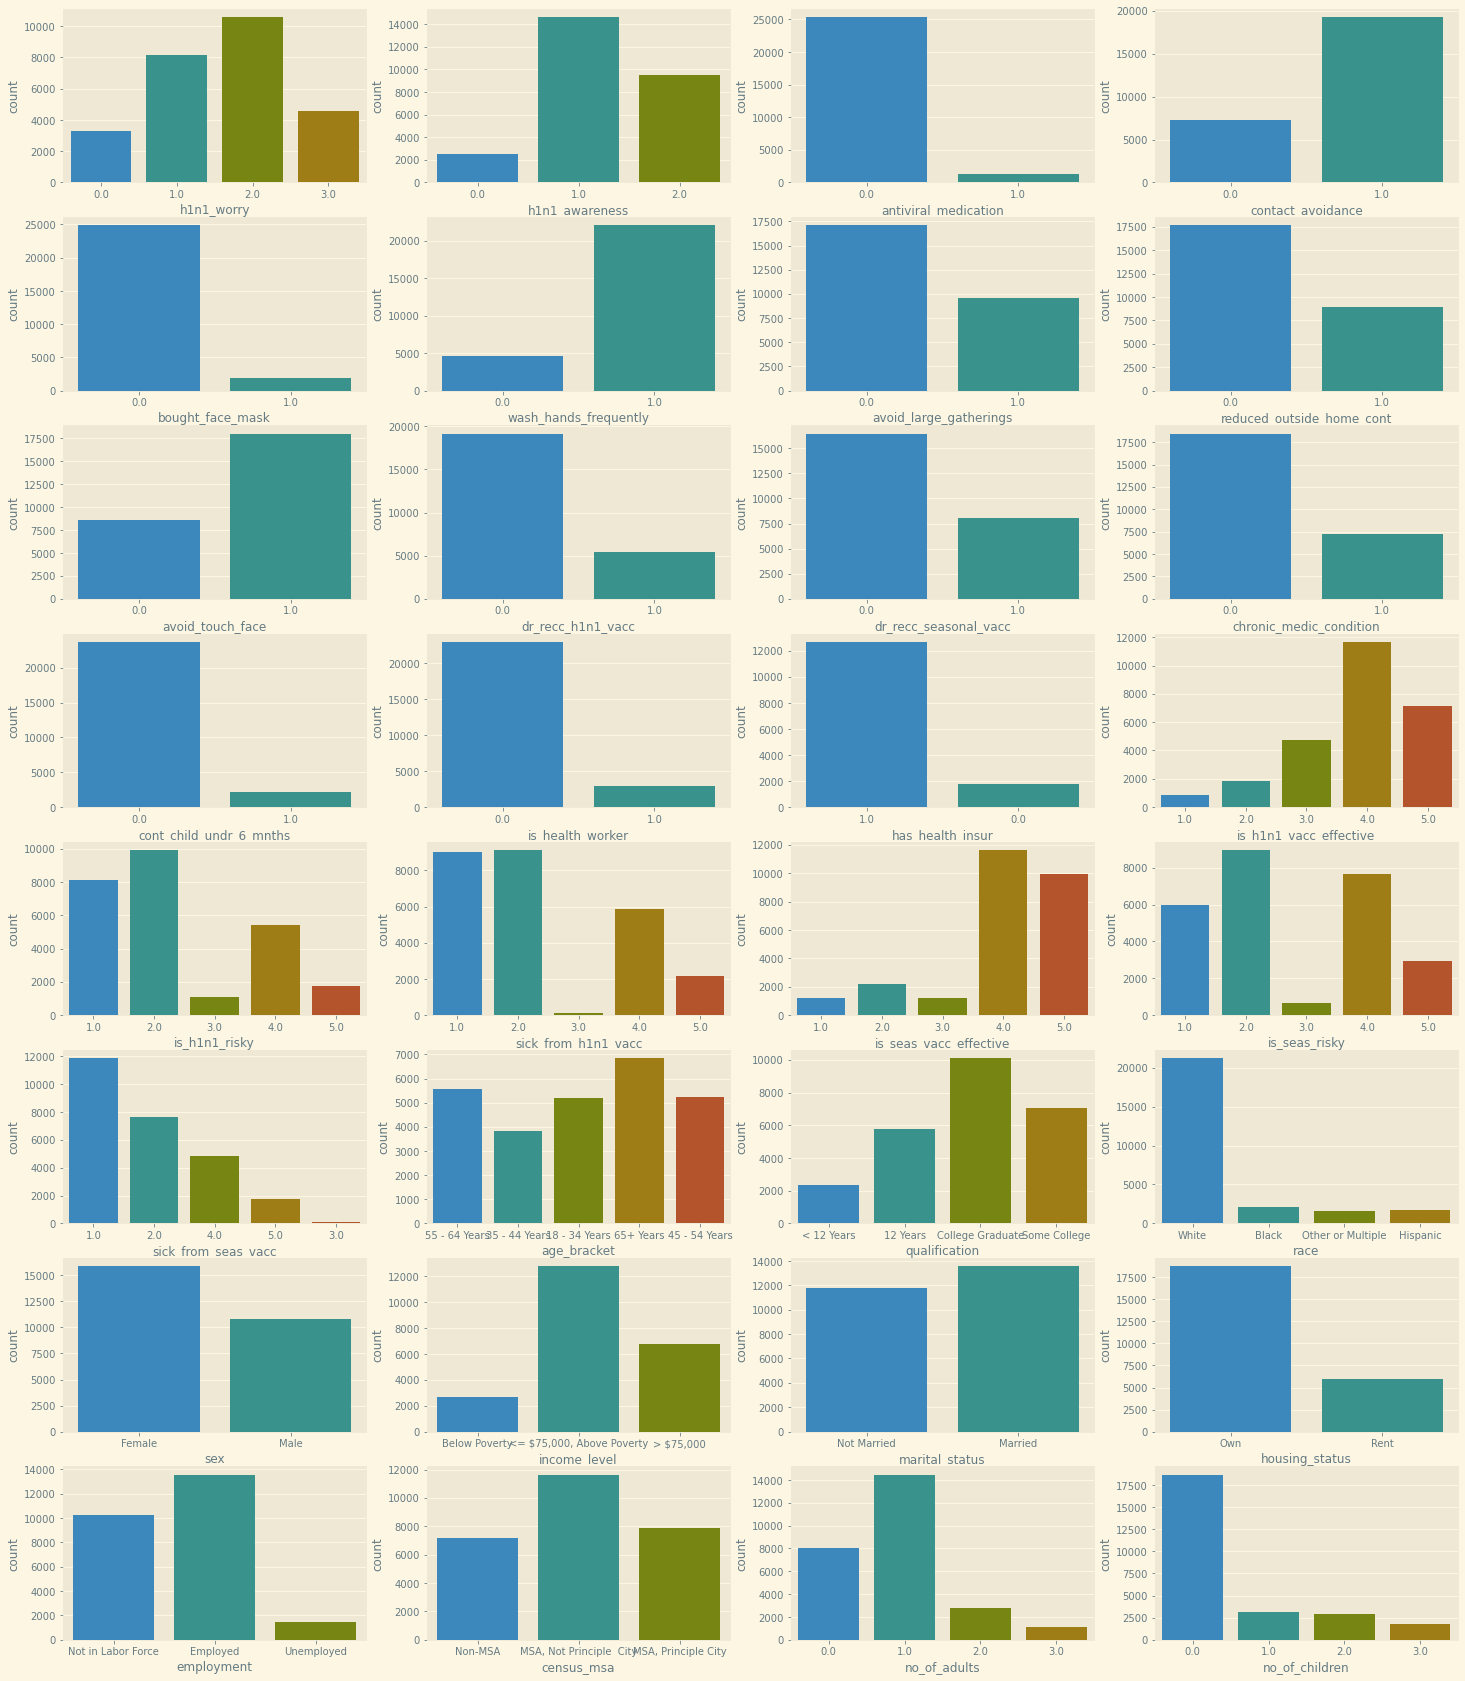

In [148]:
# Create an empty list for the categorical features
categorical = []

for column in df_features:
    
    # use 'if' statement with condition to check the categorical type
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' datatype in the list 'categorical'
        categorical.append(column)
        
# plot the countplot for each categorical variable
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 8, ncols = 4, figsize=(25,30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    #use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_vaccine[variable], ax = subplot)

# Display the plot   
plt.show()

In [149]:
class_frequency = df_target.h1n1_vaccine.value_counts()
class_frequency

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

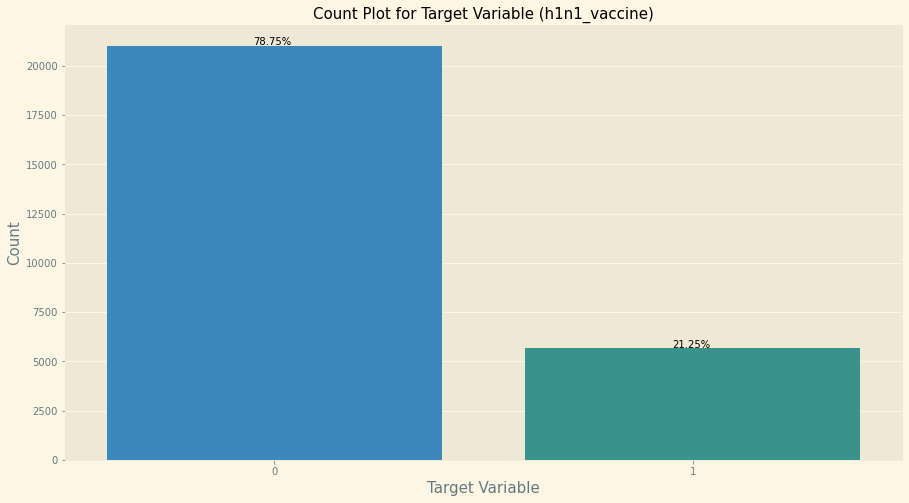

In [150]:
sns.countplot(x=df_target.h1n1_vaccine)
plt.text(x = -0.05, y = df_target.h1n1_vaccine.value_counts()[0] + 30,
         s = str(round((class_frequency[0])*100/len(df_target.h1n1_vaccine),2)) + '%')
plt.text(x = 0.95, y = df_target.h1n1_vaccine.value_counts()[1] +20,
         s = str(round((class_frequency[1])*100/len(df_target.h1n1_vaccine),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (h1n1_vaccine)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

#### Correlation

Since all our variables are categorical, therefore, we skip this step.

#### Missing values

In [151]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_vaccine.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_vaccine.isnull().sum()*100/df_vaccine.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
has_health_insur,12274,45.957989
income_level,4423,16.561201
dr_recc_h1n1_vacc,2160,8.087767
dr_recc_seasonal_vacc,2160,8.087767
housing_status,2042,7.645936
employment,1463,5.477965
marital_status,1408,5.272026
qualification,1407,5.268282
chronic_medic_condition,971,3.635751
cont_child_undr_6_mnths,820,3.070356


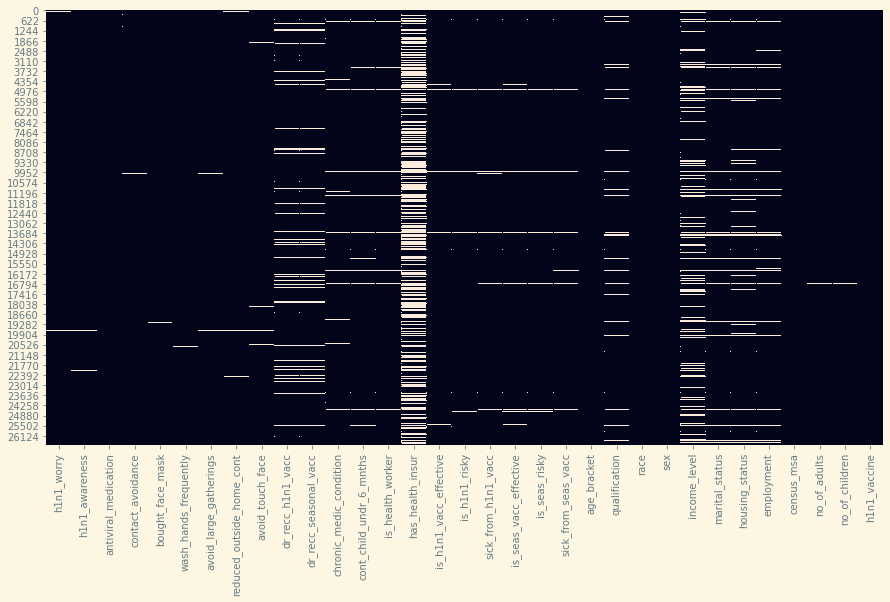

In [152]:
sns.heatmap(df_vaccine.isnull(), cbar=False)
plt.show()

The horizontal lines in the heatmap correspond to the missing values.

In [153]:
df_vaccine.drop(['has_health_insur', 'income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc'],axis=1, inplace=True)

In [154]:
df_vaccine.shape

(26707, 29)

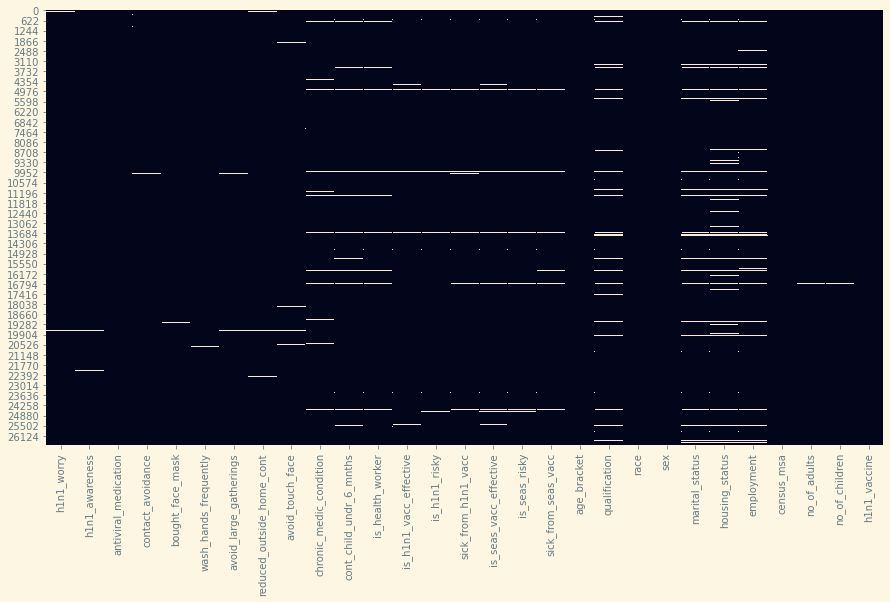

In [155]:
sns.heatmap(df_vaccine.isnull(), cbar=False)
plt.show()

In [156]:
df_vaccine.dropna(axis=0, inplace=True)

In [157]:
df_vaccine.shape

(23426, 29)

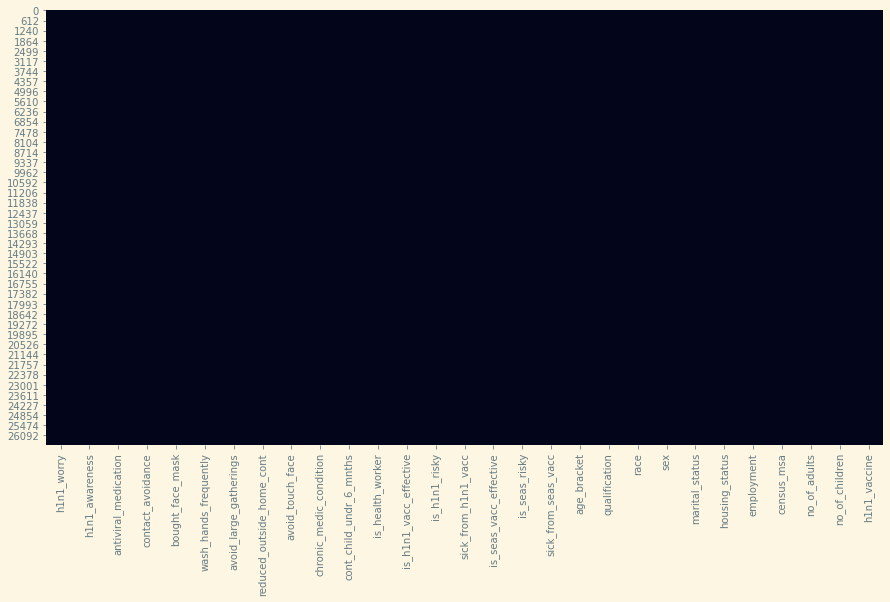

In [158]:
sns.heatmap(df_vaccine.isnull(), cbar=False)
plt.show()

In [159]:
df_vaccine.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

#### Prepare the data

In [160]:
df_vaccine.dtypes

h1n1_worry                   object
h1n1_awareness               object
antiviral_medication         object
contact_avoidance            object
bought_face_mask             object
wash_hands_frequently        object
avoid_large_gatherings       object
reduced_outside_home_cont    object
avoid_touch_face             object
chronic_medic_condition      object
cont_child_undr_6_mnths      object
is_health_worker             object
is_h1n1_vacc_effective       object
is_h1n1_risky                object
sick_from_h1n1_vacc          object
is_seas_vacc_effective       object
is_seas_risky                object
sick_from_seas_vacc          object
age_bracket                  object
qualification                object
race                         object
sex                          object
marital_status               object
housing_status               object
employment                   object
census_msa                   object
no_of_adults                 object
no_of_children              

In [161]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_vaccine:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_vaccine[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

In [162]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_vaccine[categorical]

# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_vaccine.drop(categorical, axis = 1)

#### Dummy encode the categorical variables

In [163]:
df_cat.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,1,0,0,0,0,0,0,1,1,0,0,0,3,1,2,2,1,2,55 - 64 Years,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,Non-MSA,0,0
1,3,2,0,1,0,1,0,1,1,0,0,0,5,4,4,4,2,4,35 - 44 Years,12 Years,White,Male,Not Married,Rent,Employed,"MSA, Not Principle City",0,0
2,1,1,0,1,0,0,0,0,0,1,0,0,3,1,1,4,1,2,18 - 34 Years,College Graduate,White,Male,Not Married,Own,Employed,"MSA, Not Principle City",2,0
3,1,1,0,1,0,1,1,0,0,1,0,0,3,3,5,5,4,1,65+ Years,12 Years,White,Female,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0,0
4,2,1,0,1,0,1,1,0,1,0,0,0,3,3,2,3,1,4,45 - 54 Years,Some College,White,Female,Married,Own,Employed,"MSA, Not Principle City",1,0


In [164]:
df_cat_dummies = pd.get_dummies(df_cat, drop_first=True)

In [165]:
df_cat_dummies.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [166]:
df_cat_dummies.shape

(23426, 62)

In [167]:
# Target variable
y = pd.DataFrame(df_num)

In [168]:
# Feature variables
X = pd.DataFrame(df_cat_dummies)

In [169]:
X.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [170]:
# Create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performance measures on test set
    return(classification_report(y_test, y_pred))

In [171]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))
#The kappa statistic is a measure of how closely the instances classified by the machine learning
#classifier matched the data labeled as ground truth, controlling for the accuracy of a random
#classifier as measured by the expected accuracy.
#kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.

In [172]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [173]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [174]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card
# append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

### Logistic regression

#### Logistic Regression (MLE)

In [175]:
# add the intercept column using 'add_constant()'
X = sm.add_constant(X)

# print the first five bservations after adding intercept
X.head()

,const,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,reduced_outside_home_cont_1.0,avoid_touch_face_1.0,chronic_medic_condition_1.0,cont_child_undr_6_mnths_1.0,is_health_worker_1.0,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0
0,1.0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,1.0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0
3,1.0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
4,1.0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [176]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (16398, 63)
y_train (16398, 1)
X_test (7028, 63)
y_test (7028, 1)


###### Build a logistic regression model using statsmodels Logit().

In [177]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
log_reg_model = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.414325
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                16398
Model:                          Logit   Df Residuals:                    16335
Method:                           MLE   Df Model:                           62
Date:                Thu, 13 Jan 2022   Pseudo R-squ.:                  0.1990
Time:                        12:45:00   Log-Likelihood:                -6794.1
converged:                       True   LL-Null:                       -8482.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.4648      0.297    -15.041     

#### Do predictions on the test set

In [178]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(X_test)

# print the y_pred_prob
y_pred_prob.head()

9480     0.193582
25478    0.663039
16789    0.091390
8036     0.121057
7121     0.156698
dtype: float64

In [179]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = ['0' if x < 0.5 else '1' for x in y_pred_prob]

In [180]:
# convert the predicted values to type 'float32'
y_pred = np.array(y_pred, dtype=np.float32)

# print the first five predictions
y_pred[0:5]

array([0., 1., 0., 0., 0.], dtype=float32)

#### Calculate the performance measures

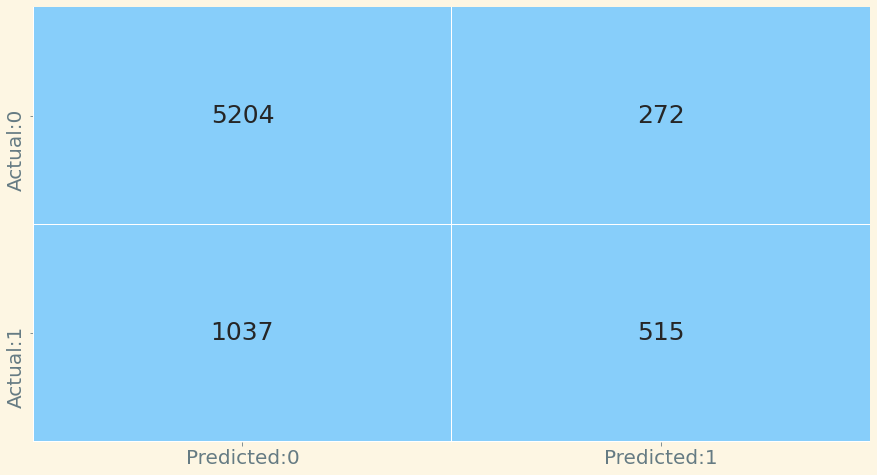

In [181]:
# call the function to plot the confusion matrix
# pass the logistic regression model to the function
plot_confusion_matrix(log_reg_model)

#### Calculate performance measures on the test set

In [182]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression model to the function
test_report = get_test_report(log_reg_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5476
           1       0.65      0.33      0.44      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.64      0.66      7028
weighted avg       0.79      0.81      0.79      7028



In [183]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression model to the function
kappa_value = kappa_score(log_reg_model)

# print the kappa value
print(kappa_value)

0.3426774787926872


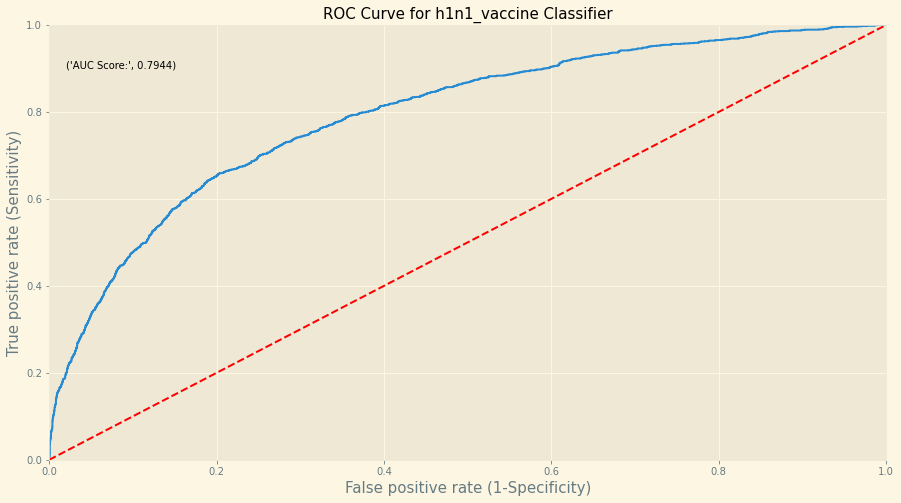

In [184]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression model to the function
plot_roc(log_reg_model)

#### Tabulate the results

In [185]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.33183,0.813745,0.342677,0.440359


#### Logistic Regression (SGD)

#### Build the model

In [186]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# fit the model on scaled training data
logreg_with_SGD = SGD.fit(X_train, y_train)

#### Do predictions on the test set

In [188]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(X_test)

#### Compute accuracy measures

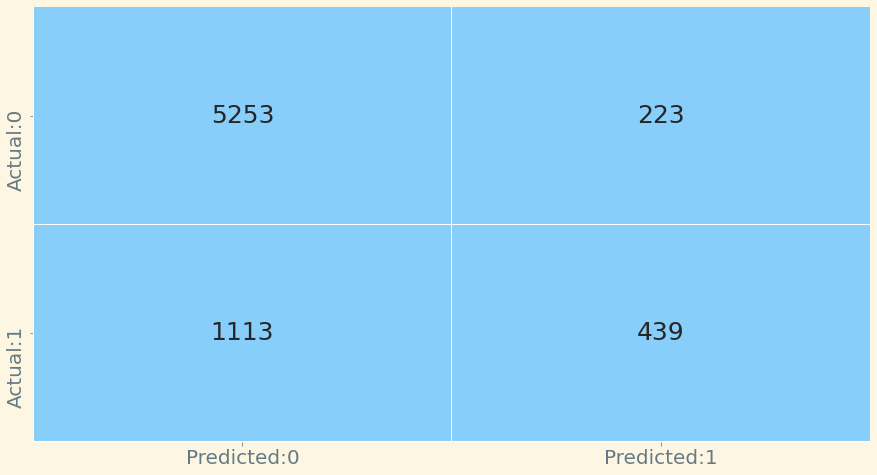

In [190]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

In [191]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5476
           1       0.66      0.28      0.40      1552

    accuracy                           0.81      7028
   macro avg       0.74      0.62      0.64      7028
weighted avg       0.79      0.81      0.78      7028



In [192]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.30475321107275866


#### Plot the ROC Curve

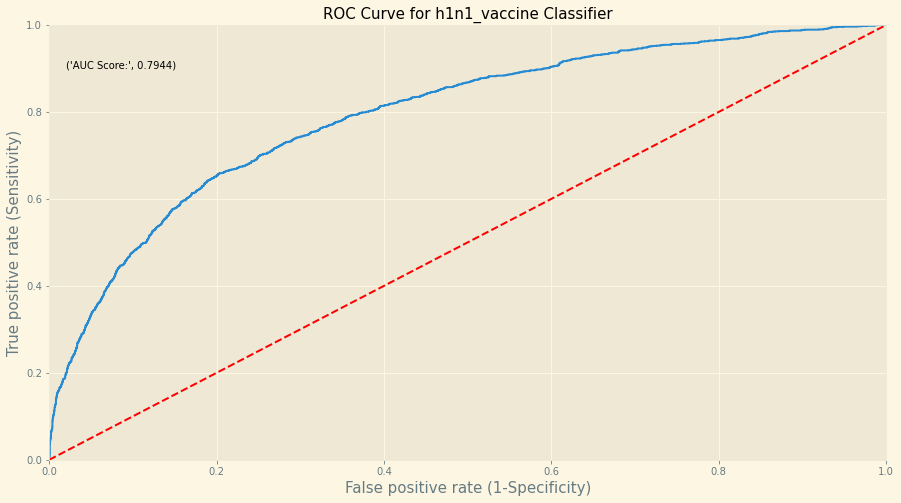

In [194]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

#### Tabulate the results

In [196]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (SGD)' as model name to the function
update_score_card(model_name = 'Logistic Regression (SGD)')
# print the 'score_card' to compare all the models
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.794406,0.654384,0.331830,0.813745,0.342677,0.440359
1,Logistic Regression (SGD),0.794406,0.663142,0.282861,0.809903,0.304753,0.396567


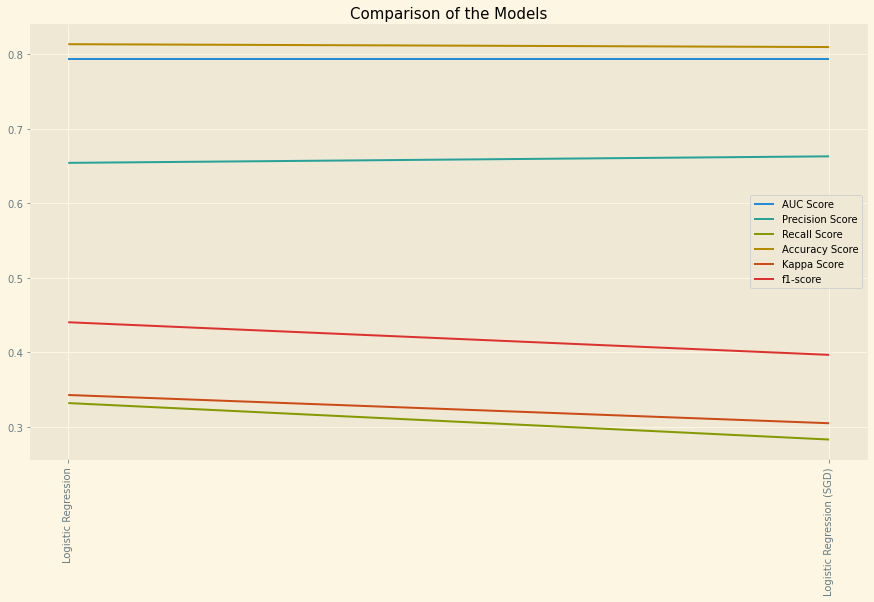

In [197]:
# plot the graph
# by default, plot() returns the line plot
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()

The graph was plotted for all the performance metrics of the models implemented. The X-axis has the model name as given in the table.

The above plot shows that the Logistic Regression(SGD) modela has lower values for Recall Score, Kappa score and F1-score when compared to the Logistic Regression model built initially. All the other performance measures are similar for both the models. Finally, it can be concluded that the Logistic Regression model can be used to predict if a person has taken a h1n1 vaccine or not. Additionally, based on the business decision, as to what is more important to predict correctly for business,i.e., predicting the people who have taken the vaccine is more important or whether it is more important to predict the people who have not taken the vaccine. Based on business decision the performance parameters like sensitivity or specificity can be fine tuned.